In [1]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## PCA 

Loading the digits dataset.

In [2]:
digits =load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

Using PCA to reduce the dimensions to 2.

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(digits.data)

In [4]:
##Creating data frame of the components

In [5]:
df = pd.DataFrame(data = components , 
        columns = ['PC1', 'PC2'])
df['Label'] = digits.target

Plotting the components against the label.
From the plot below we can see that the variance hasn't been captured well as there is a lot of overlapping of labels. 

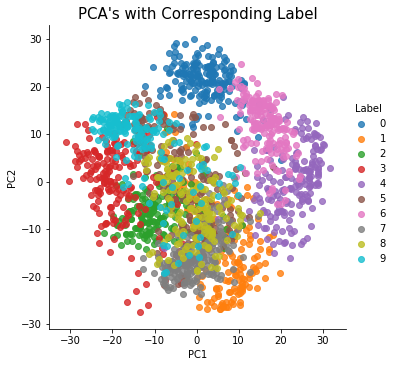

In [6]:

def plot(x_label, y_label, dataframe, title):
    sns.lmplot(
      x=x_label, 
      y=y_label,
      data=dataframe, 
      fit_reg=False, 
      hue='Label',
      legend=True,
      )
    plt.title(title, fontsize=15)
    return plt.show()
plot("PC1", "PC2", df, "PCA's with Corresponding Label")


When we check for the percentage of captured variance, we can see that only around 28% of the variance is captured by these two components.

In [7]:
pca.explained_variance_ratio_.cumsum()

array([0.14890594, 0.28509365])

Let's say we are looking to capture atleast 90% of the variance. We can do so by:

In [8]:
data= digits.data
pca_90 = PCA(n_components=0.90)
principal_components = pca_90.fit_transform(data)

We can see that we need atleast 21 components to capture 90% variance.

In [9]:
pca_90.explained_variance_ratio_.cumsum()

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 ])

## K-Means Clustering Using PCA data

Let's scale the data using sklearn.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(components)

In [11]:
scaled_data

array([[-0.09416124,  1.66318354],
       [ 0.59493359, -1.62361181],
       [ 0.52273616, -0.77831837],
       ...,
       [ 0.80753561, -0.54412497],
       [-0.36425272,  0.97125476],
       [-0.02574666,  0.49763148]])

Plotting first 10 images with their corresponding labels.

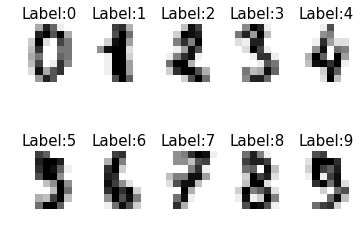

In [12]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.subplots_adjust(hspace=0.4)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label:' + str(label), fontsize=15)

Spliting the data into train test set.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( scaled_data, digits.target, test_size=0.20, random_state=42)

Running the KMeans clustering on the data.

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)
pred= kmeans.predict(X_train)
kmeans.cluster_centers_.shape

(10, 2)

Creating the new data frame using training data and label data from kmeans to visualiize the clusters as well recognize the label provided by the kmeans.

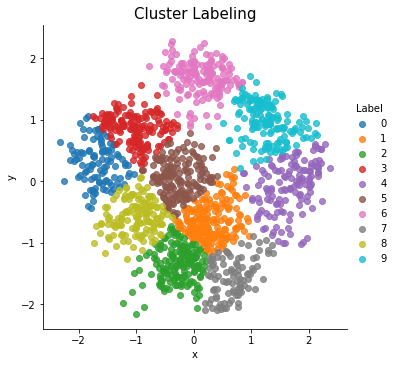

In [20]:
newdf= pd.DataFrame(data = X_train , 
        columns = ['x', 'y'])
newdf['Label'] = pred
newdf.head()
plot("x", "y", newdf, "Cluster Labeling")

Let's see our result on the test data.
We can see that our clustering does a decent job to separate the clusters.

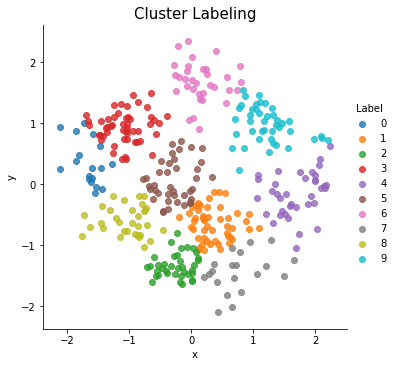

In [21]:
test_pred= kmeans.predict(X_test)
test= pd.DataFrame(data = X_test , 
        columns = ['x', 'y'])
test['Label'] = test_pred
plot("x", "y", test, "Cluster Labeling")

We know that the labels from the kmeans is not going to be same as the label from the true label data.
So, we get the best matching label data between kmeans label and true labels.

In [22]:
from scipy.stats import mode
import numpy as np
# Assigning  label data that depicts the  clusters using mode to get the best matching data.
new_label = np.zeros_like(test_pred)
for i in range(10):
    match = (test_pred == i)
    new_label[match] = mode(y_test[match])[0] 
new_label

array([6, 9, 3, 5, 5, 5, 5, 2, 5, 2, 7, 6, 5, 0, 4, 2, 3, 7, 5, 5, 4, 2,
       9, 7, 5, 6, 9, 7, 6, 9, 6, 9, 5, 6, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 5, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 6, 0, 5, 5, 4, 5, 5, 4, 9,
       7, 0, 7, 0, 9, 9, 0, 5, 7, 0, 4, 5, 9, 3, 9, 0, 2, 2, 5, 0, 6, 4,
       4, 9, 1, 2, 5, 3, 9, 5, 9, 6, 4, 5, 1, 3, 5, 2, 5, 7, 5, 5, 4, 2,
       7, 1, 4, 4, 1, 3, 5, 7, 5, 5, 2, 6, 9, 6, 0, 7, 5, 7, 7, 5, 7, 2,
       7, 5, 0, 6, 6, 4, 2, 5, 0, 9, 4, 0, 5, 5, 6, 9, 0, 5, 9, 6, 6, 0,
       6, 4, 9, 9, 3, 7, 1, 2, 9, 0, 6, 5, 2, 6, 5, 7, 9, 5, 4, 2, 1, 5,
       7, 7, 2, 2, 3, 9, 5, 0, 2, 2, 5, 5, 6, 3, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 5, 9, 9, 5, 7, 7, 9, 4, 5, 1, 5, 4, 4, 9, 0, 1, 2, 6, 0, 4, 5,
       2, 7, 4, 6, 6, 5, 6, 6, 3, 2, 2, 6, 7, 9, 9, 5, 4, 1, 6, 7, 7, 9,
       5, 1, 0, 5, 5, 5, 7, 7, 7, 6, 2, 2, 2, 3, 4, 5, 7, 2, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 9, 5, 5, 2, 6, 0, 4, 5, 0, 0, 9, 6, 9, 9, 1, 2, 5,
       9, 9, 9, 5, 5, 9, 3, 5, 0, 5, 5, 3, 4, 0, 5,

Printing accuracy and getting the confusion matrix

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, new_label)

0.6166666666666667

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, new_label)

array([[28,  0,  0,  0,  0,  1,  3,  0,  0,  1],
       [ 0, 14,  0,  0,  0, 10,  0,  2,  0,  2],
       [ 0,  0, 20,  0,  0, 12,  0,  1,  0,  0],
       [ 0,  0, 10, 15,  0,  2,  0,  1,  0,  6],
       [ 0,  1,  0,  0, 36,  3,  6,  0,  0,  0],
       [ 2,  0,  1,  0,  0, 27,  1,  3,  0, 13],
       [ 3,  0,  0,  0,  1,  0, 31,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  7,  0, 22,  0,  0],
       [ 0,  0,  1,  0,  0, 25,  0,  4,  0,  0],
       [ 0,  0,  0,  3,  0,  3,  1,  4,  0, 29]])

## KMeans Without PCA

In [25]:
new_digits= load_digits()

X_newtrain, X_newtest, y_newtrain, y_newtest = train_test_split(new_digits.data, new_digits.target, test_size=0.20, random_state=42)
kmeans = KMeans(n_clusters=10, random_state=12)
kmeans.fit(X_newtrain)
pred= kmeans.predict(X_newtest)

Checking if cluster gives us the recognization of digits. We can see that except maybe 8 we can recognize rest of the digits.

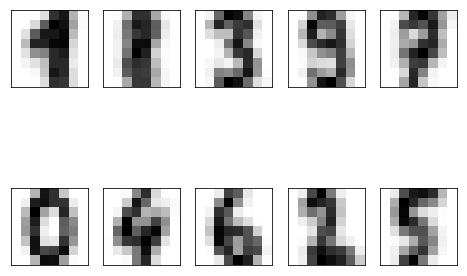

In [27]:
fig, ax = plt.subplots(2, 5, figsize=(8, 6))
for axi, digit in zip(ax.flat, kmeans.cluster_centers_.reshape(10,8,8)):
    axi.set(xticks=[], yticks=[])
    axi.imshow(digit, interpolation='nearest',cmap=plt.cm.binary)

In [28]:
from scipy.stats import mode
import numpy as np
# Assigning  label data that depicts the  clusters.
label = np.zeros_like(pred)
for i in range(10):
    match = (pred == i)
    label[match] = mode(y_test[match])[0]
label

array([6, 9, 3, 7, 2, 2, 5, 3, 5, 2, 8, 1, 4, 0, 4, 2, 3, 7, 9, 9, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 2, 4, 4, 6, 9, 4, 7, 6, 6, 9, 8, 3,
       6, 1, 3, 0, 6, 5, 5, 8, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 9,
       7, 0, 7, 9, 9, 9, 5, 7, 7, 0, 4, 5, 9, 9, 9, 0, 2, 3, 9, 0, 6, 4,
       4, 3, 8, 2, 8, 3, 9, 2, 9, 4, 4, 7, 4, 3, 5, 3, 1, 8, 5, 1, 4, 2,
       7, 7, 4, 4, 1, 9, 8, 7, 9, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 8, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 1, 6, 9, 0, 9, 9, 6, 6, 0,
       6, 4, 9, 9, 3, 8, 7, 2, 9, 0, 4, 5, 8, 6, 5, 7, 9, 8, 4, 2, 8, 3,
       7, 7, 2, 2, 3, 9, 9, 0, 3, 2, 3, 5, 6, 9, 9, 4, 8, 5, 4, 2, 3, 6,
       4, 8, 9, 9, 5, 7, 8, 9, 4, 8, 8, 5, 4, 4, 9, 6, 8, 9, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 2, 4, 7, 6, 5, 8, 9,
       5, 8, 0, 2, 8, 8, 7, 5, 7, 6, 2, 2, 2, 3, 4, 9, 8, 3, 6, 0, 9, 7,
       7, 0, 8, 0, 4, 9, 8, 5, 3, 6, 0, 4, 2, 0, 0, 3, 6, 9, 9, 7, 3, 5,
       9, 9, 9, 8, 5, 3, 3, 8, 0, 5, 8, 3, 4, 0, 2,

We can see that, we get more accuracy if we are to  use all 64 dimensions.|

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, label)

0.8055555555555556

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, label)

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  7,  5,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0, 29,  2,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  2,  2],
       [ 0,  1,  0,  0, 43,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  1,  0,  0, 14],
       [ 1,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  1,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  1, 18,  9],
       [ 0,  3,  0,  1,  0,  1,  0,  2,  1, 32]])